### Handling imbalanced dataset in machine learning 

### SMOTE -Syhthetic Minority Oversampling Technique

In [234]:
# Import data
my_df = pd.read_csv("german_credit.csv")

# Extract features and target variable
x = my_df.drop(["Creditability"], axis=1)
# X = my_df.drop(["Creditability"], axis="columns")
y = my_df["Creditability"]

In [6]:
y.value_counts()

Creditability
1    700
0    300
Name: count, dtype: int64

In [235]:
# Split the sample data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
y_train.value_counts()

Creditability
1    562
0    238
Name: count, dtype: int64

In [ ]:
pip install -U imbalanced-learn

In [236]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
import pandas as pd

In [237]:
# oversampling the train dataset using SMOTE
smt= SMOTE(sampling_strategy="minority")

In [238]:
# x_train, y_train = smt.fit_resample(x_train, y_train)
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

In [239]:
y_train_sm.value_counts()

Creditability
1    562
0    562
Name: count, dtype: int64

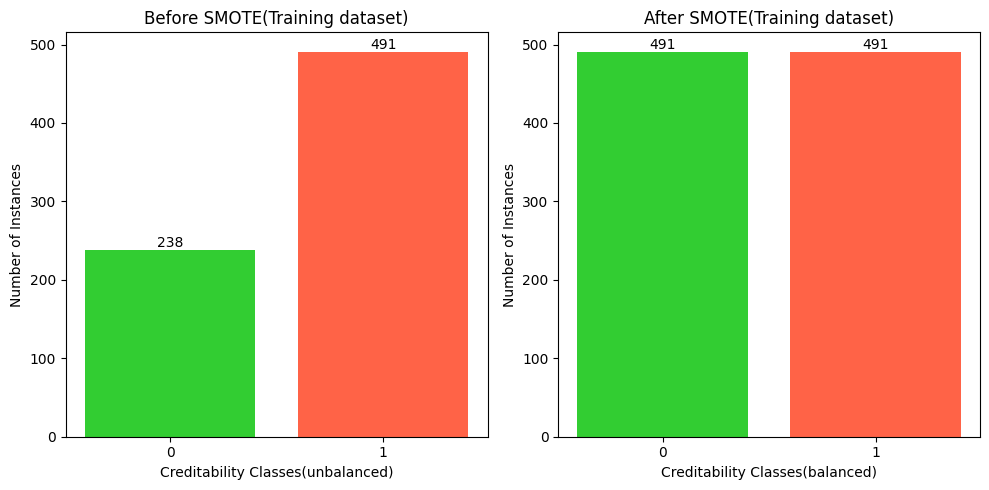

In [6]:
import matplotlib.pyplot as plt

# Before SMOTE, training data
class_0_count_before_smote = 238
class_1_count_before_smote = 491

# After SMOTE
class_0_count_after_smote = 491
class_1_count_after_smote = 491

# Class labels
classes = ['0', '1']

# Plotting the bar graphs
plt.figure(figsize=(10, 5))

# Before SMOTE
plt.subplot(1, 2, 1)
counts_before_smote = [class_0_count_before_smote, class_1_count_before_smote]
plt.bar(classes, counts_before_smote, color=['limegreen', 'tomato'])
plt.xlabel('Creditability Classes(unbalanced)')
plt.ylabel('Number of Instances')
plt.title('Before SMOTE(Training dataset)')
for i, count in enumerate(counts_before_smote):
    plt.text(i, count, str(count), ha='center', va='bottom')

# After SMOTE
plt.subplot(1, 2, 2)
counts_after_smote = [class_0_count_after_smote, class_1_count_after_smote]
plt.bar(classes, counts_after_smote, color=['limegreen', 'tomato'])
plt.xlabel('Creditability Classes(balanced)')
plt.ylabel('Number of Instances')
plt.title('After SMOTE(Training dataset)')
for i, count in enumerate(counts_after_smote):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [240]:
# Training the balanced data
x_train_sm, y_train_sm
x_train_sm, x_test, y_train_sm, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

After resampling, X_resampled and y_resampled will contain the balanced dataset.

Remember to split your data into training and testing sets before applying SMOTE to avoid data leakage: the term "data leakage" refers to a situation where information from the test set inadvertently influences the training process. Data leakage can lead to overly optimistic performance estimates and inaccurate assessments of a model's generalization to new, unseen data.

In [241]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [242]:
# Use Decision Tree Classifier for feature selection
classifier = DecisionTreeClassifier(random_state=42)
feature_importances = classifier.fit(X, y).feature_importances_

In [243]:
# Train a Decision Tree classifier on the selected features
new_classifier = DecisionTreeClassifier(random_state=42)
new_classifier.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=42)

In [244]:
# Make predictions on the test set
y_pred = new_classifier.predict(x_test)

In [245]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [249]:
# Display evaluation metrics
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Evaluation:
Accuracy: 0.7250

Confusion Matrix:
[[ 41  21]
 [ 34 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60        62
           1       0.83      0.75      0.79       138

    accuracy                           0.73       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.74      0.72      0.73       200



# we can also display the D/tree

In [272]:
# import packages

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [289]:
# Import data
my_df = pd.read_csv("german_credit.csv")

In [274]:
# Extract features and target variable
X = my_df.drop(["Creditability"], axis=1)
y = my_df["Creditability"]

In [290]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [291]:
# Oversample the training dataset using SMOTE
smt = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

In [292]:
# Train a Decision Tree classifier on the resampled data
classifier = DecisionTreeClassifier(random_state=99)
classifier.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=99)

In [293]:
# Make predictions on the test set
y_pred = classifier.predict(x_test)

In [294]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [295]:

# Display evaluation metrics
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Model Evaluation:
Accuracy: 0.7100

Confusion Matrix:
[[ 30  27]
 [ 31 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        57
           1       0.81      0.78      0.79       143

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.72      0.71      0.71       200



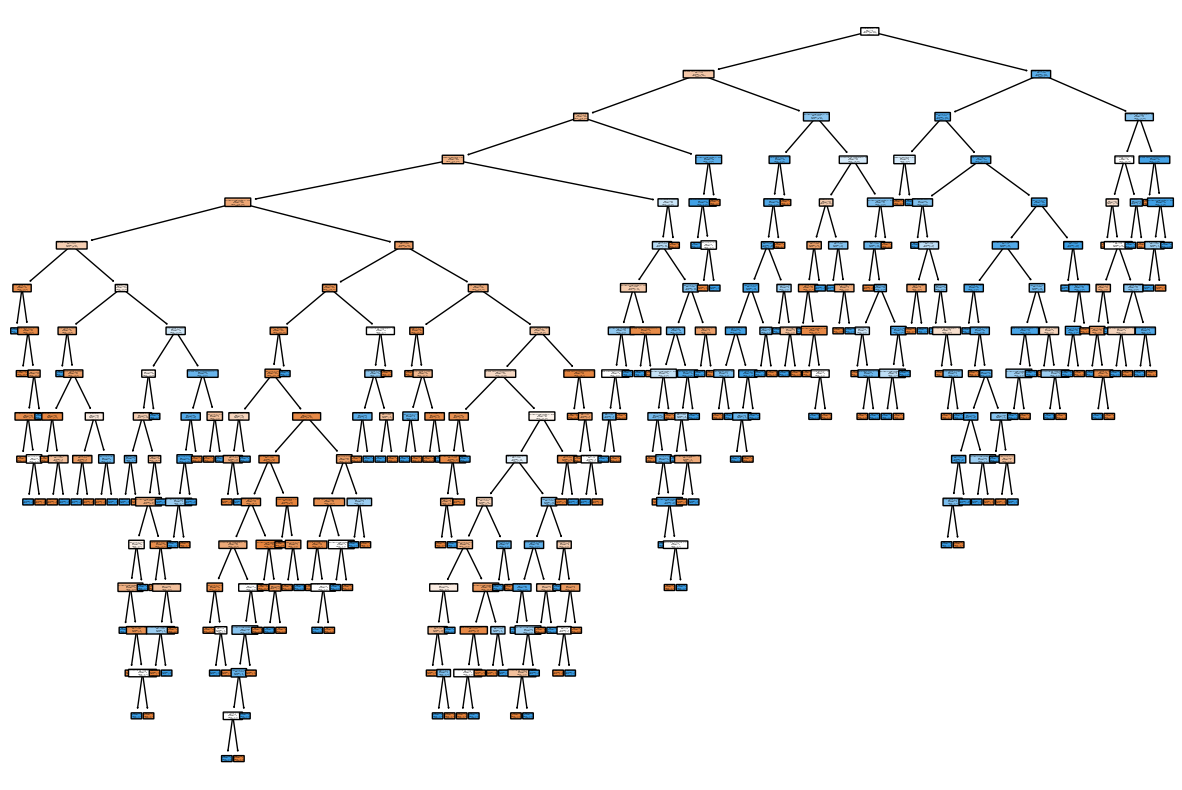

In [271]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.show()